In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image as Image
import os
from sklearn.model_selection import train_test_split


In [173]:
basePath = 'samples'
images = os.listdir(basePath)

randIndexes = np.random.permutation( len(images) )
randImages = np.random.choice(images, len(images), replace=False)
print(randImages)

['360_F_540253794_6Rwb7P5Cq8nrszOIiNRGgmxbHubyNTlT.jpg'
 'png-transparent-flame-fire-logo-flame-orange-computer-wallpa.png'
 'pngtree-fire-logo-icon-png-image_3232568.jpg'
 'pngtree-fire-logo-design-png-image_2356080.jpg'
 'png-transparent-fire-graphics-illustration-fire-flame-hot-fi.png'
 '360_F_480004725_fL9lu3GLI1ppoa57KDKLxNGjlSe4EaZo.jpg'
 'pngtree-fire-logo-design-template-vector-png-image_1588148.jpg'
 '3b788502a7c4609a06c75a50b627bb4d.jpg'
 'pngtree-fire-vector-icon-logo-png-image_4994900.png'
 'png-transparent-graphic-design-icon-flame-icon-design-symbol.png'
 'c326ce5367a61e8d423e34b08b4cd6e3.jpg'
 'png-transparent-background-motif-logo-flame-fire-cdr-combust.png'
 '360_F_127906890_yED6EjWNrSS0cQb2OJsNgXTJQ9ahW5gL.jpg'
 '360_F_284466038_lOHcM8pRGyigojkyV2M9CSQpimCTcqeD.jpg'
 'png-transparent-flame-logo-flame-graphic-design-flame-televi.png'
 '44d66d8455820aa5ab0b8a2bd8c74bcf.jpg'
 '360_F_223328084_ukjm42dHi6s9eloXbwjpAUtagsdDP6UA.jpg'
 '908c0d23018e62e993b3b461811bcb26.jpg'
 

samples/360_F_540253794_6Rwb7P5Cq8nrszOIiNRGgmxbHubyNTlT.jpg
[360 360]
samples/png-transparent-flame-fire-logo-flame-orange-computer-wallpa.png
[360 360]
samples/pngtree-fire-logo-icon-png-image_3232568.jpg
[360 360]
samples/pngtree-fire-logo-design-png-image_2356080.jpg
[360 360]
samples/png-transparent-fire-graphics-illustration-fire-flame-hot-fi.png
[360 360]
samples/360_F_480004725_fL9lu3GLI1ppoa57KDKLxNGjlSe4EaZo.jpg
[360 360]
samples/pngtree-fire-logo-design-template-vector-png-image_1588148.jpg
[360 360]
samples/3b788502a7c4609a06c75a50b627bb4d.jpg
[360 360]
samples/pngtree-fire-vector-icon-logo-png-image_4994900.png
[360 360]
samples/png-transparent-graphic-design-icon-flame-icon-design-symbol.png
[360 360]
samples/c326ce5367a61e8d423e34b08b4cd6e3.jpg
[360 360]
samples/png-transparent-background-motif-logo-flame-fire-cdr-combust.png
[360 360]
samples/360_F_127906890_yED6EjWNrSS0cQb2OJsNgXTJQ9ahW5gL.jpg
[360 360]
samples/360_F_284466038_lOHcM8pRGyigojkyV2M9CSQpimCTcqeD.jpg
[360 

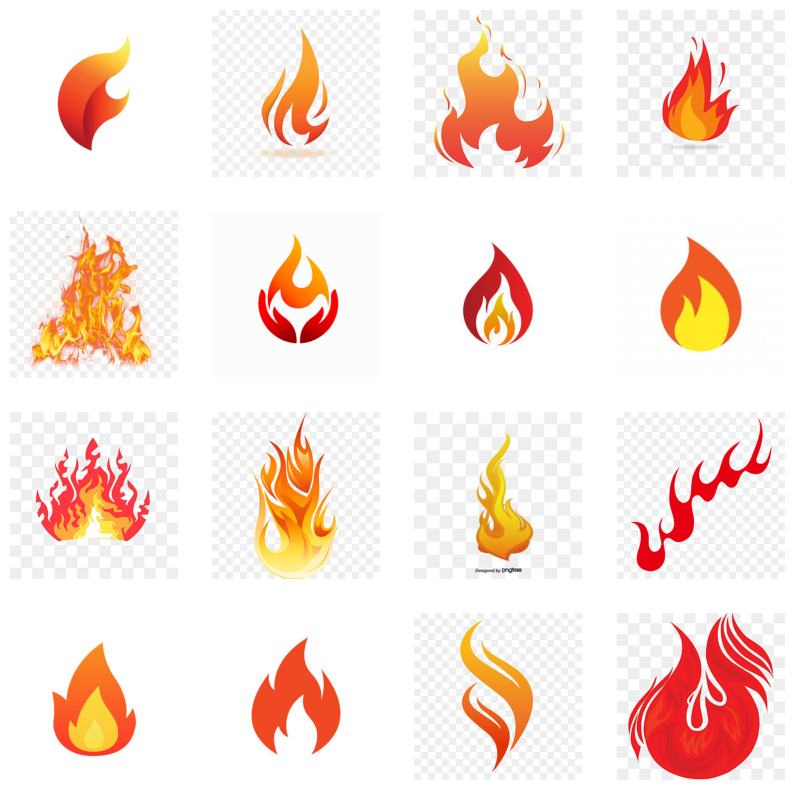

In [174]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, imgName in zip(axes.flatten(), randImages):
    print(f"{basePath}/{imgName}")
    image = Image.open(f"{basePath}/{imgName}")
    image.convert('RGB')
    print(np.array(image.size))
    ax.imshow( image )
    ax.axis("off")